In [1]:
#loading packages
library(dplyr)
library(readr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




#Loading the dataset

In [2]:
dataset <- read.csv("/content/online_shoppers_intention.csv")
glimpse(dataset)

Rows: 12,330
Columns: 18
$ Administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2…
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0…
$ Informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0…
$ ProductRelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, 2…
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627.…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.05000…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.14000…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, 0…
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Feb…
$ OperatingSystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 1…
$ Browser      

In [3]:
#data structure
summary(dataset)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

#Accessing information from the dataset

In [4]:
#checking for number of columns
ncol(dataset)

[1] 18

In [5]:
#checking for the number of rows
nrow(dataset)

[1] 12330

In [6]:
#checking for duplicates
sum(duplicated(dataset))

[1] 119

In [7]:
#checking for missing values
sum(is.na(dataset))

[1] 112

* The dataset contains 12330 rows and 18 columns
* We have 119 duplicated values and 112 missing values which we will deal with them in the next step

#Data Cleaning

In [8]:
install.packages('mice')
library(mice)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




In [9]:
#Percentage of missing values per column
p <- function(x) {sum(is.na(x))/length(x)*100}
apply(dataset, 2, p)

Administrative Administrative_Duration           Informational 
              0.1135442               0.1135442               0.1135442 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              0.1135442               0.1135442               0.1135442 
            BounceRates               ExitRates              PageValues 
              0.1135442               0.1135442               0.0000000 
             SpecialDay                   Month        OperatingSystems 
              0.0000000               0.0000000               0.0000000 
                Browser                  Region             TrafficType 
              0.0000000               0.0000000               0.0000000 
            VisitorType                 Weekend                 Revenue 
              0.0000000               0.0000000               0.0000000

,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,
12316,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
14,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,8
,0,0,0,0,0,0,0,0,0,0,14,14,14,14,14,14,14,14,112


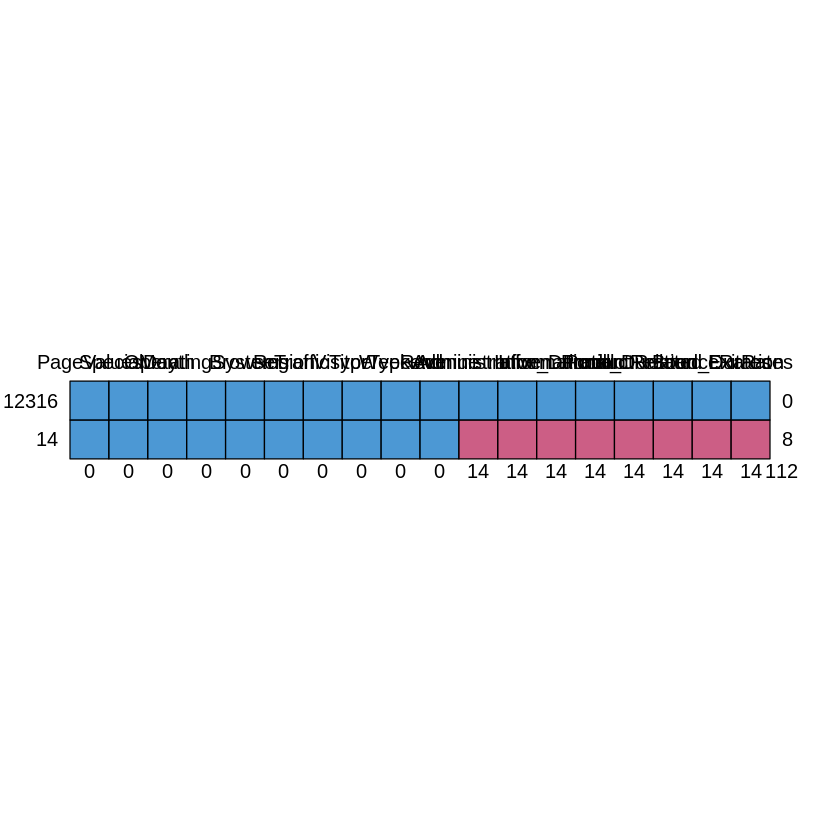

In [10]:
# A table and plot for missing values
md.pattern(dataset)

In [11]:
#removing missing values
clean_dataset <- na.omit(dataset)

In [12]:
#checking for missing values
sum(is.na(clean_dataset))

[1] 0

In [13]:
#removing duplicates
library(dplyr)

In [14]:
clean_dataset = clean_dataset %>% distinct()

In [15]:
#assessing if we still have duplicated values
sum(duplicated(clean_dataset))

[1] 0

Encoding categorical data

In [16]:
clean_dataset$Revenue = factor(clean_dataset$Revenue,
                       levels = c('FALSE', 'TRUE'),
                       labels = c(1,2))

In [17]:
clean_dataset$Weekend = factor(clean_dataset$Weekend,
                       levels = c('FALSE', 'TRUE'),
                       labels = c(1,2))

In [18]:
clean_dataset$VisitorType = factor(clean_dataset$VisitorType,
                       levels = c('Returning_Visitor', 'New_Visitor', 'Other'),
                       labels = c(1,2,3))

In [19]:
#Anomaly/outlier detection/removal
summary(clean_dataset)

 Administrative  Administrative_Duration Informational    
 Min.   : 0.00   Min.   :  -1.00         Min.   : 0.0000  
 1st Qu.: 0.00   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.00   Median :   9.00         Median : 0.0000  
 Mean   : 2.34   Mean   :  81.68         Mean   : 0.5088  
 3rd Qu.: 4.00   3rd Qu.:  94.75         3rd Qu.: 0.0000  
 Max.   :27.00   Max.   :3398.75         Max.   :24.0000  
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  8.00   1st Qu.:  193.6        
 Median :   0.00        Median : 18.00   Median :  609.5        
 Mean   :  34.84        Mean   : 32.06   Mean   : 1207.5        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1477.6        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
  BounceRates        ExitRates         PageValues        SpecialDay     
 Min.   :0.00000   Min.   :0.00000   Min.   :  0.000   Min.

In [20]:
# using Interquartile range to remove outliers
#clean_dataset$Administrative = clean_dataset$Administrative < 4
#clean_dataset$Administrative_Duration = clean_dataset$Administrative_Duration < 94.75
#clean_dataset$BounceRates  = clean_dataset$BounceRates < 0.02
#clean_dataset$Browser = clean_dataset$Browser < 2
#clean_dataset$ExitRates = clean_dataset$ExitRates < 0.05
#clean_dataset$Informational = clean_dataset$Informational < 0
#clean_dataset$Informational_Duration = clean_dataset$Informational_Duration < 0
#clean_dataset$OperatingSystems = clean_dataset$OperatingSystems < 3
#clean_dataset$PageValues = clean_dataset$PageValues < 0
#clean_dataset$ProductRelated = clean_dataset$ProductRelated < 38
#clean_dataset$ProductRelated_Duration = clean_dataset$ProductRelated_Duration < 1477.6
#clean_dataset$Region = clean_dataset$Region < 4
#clean_dataset$SpecialDay = clean_dataset$SpecialDay < 0
#clean_dataset$TrafficType = clean_dataset$TrafficType < 4

#Univariate Analysis

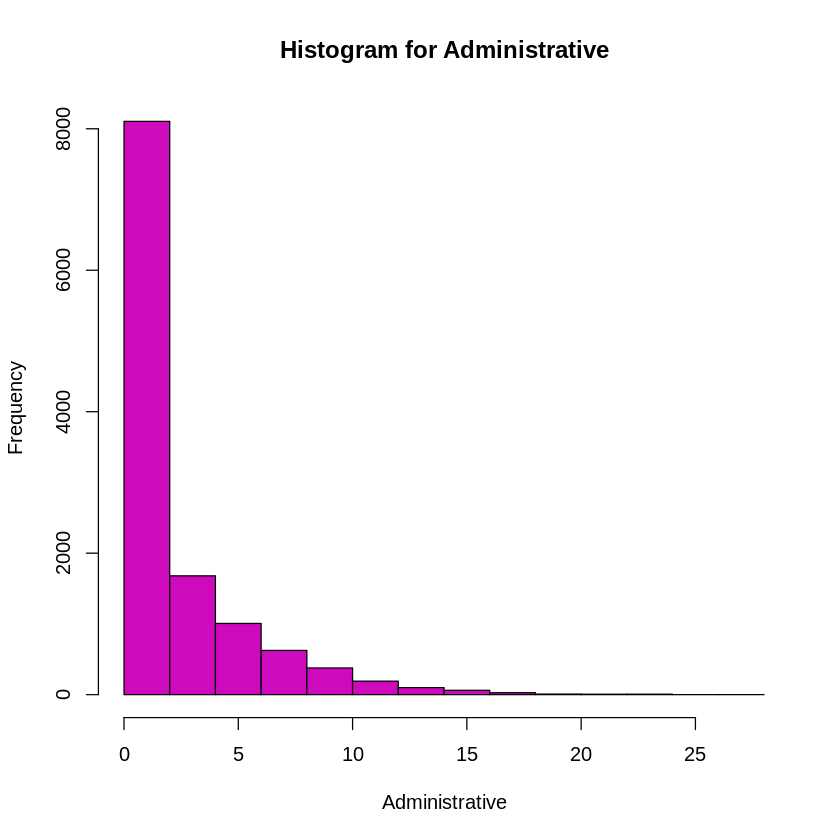

In [21]:
hist(clean_dataset$Administrative, col = 6, main = "Histogram for Administrative", xlab = "Administrative")

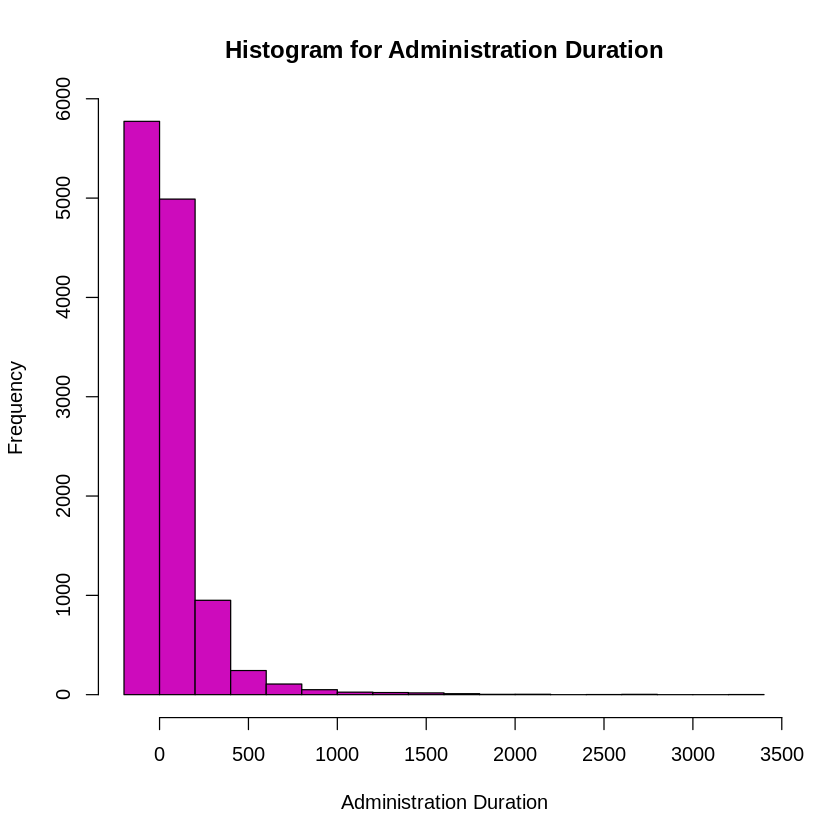

In [22]:
hist(clean_dataset$Administrative_Duration, col = 6, main = "Histogram for Administration Duration", xlab = "Administration Duration")

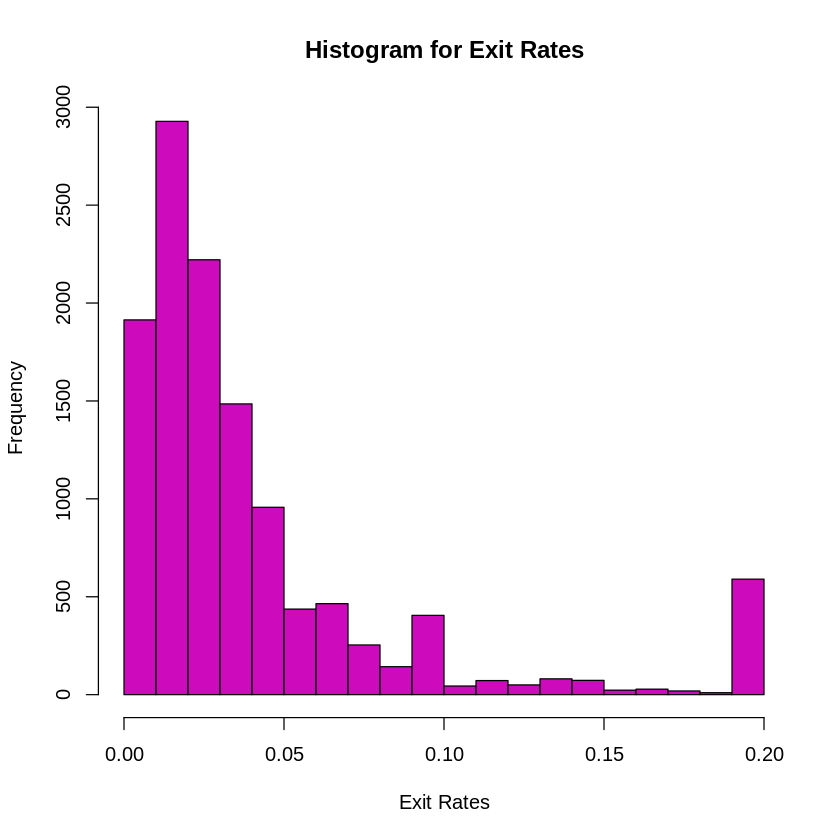

In [23]:
hist(clean_dataset$ExitRates, col = 6, main = "Histogram for Exit Rates", xlab = "Exit Rates")

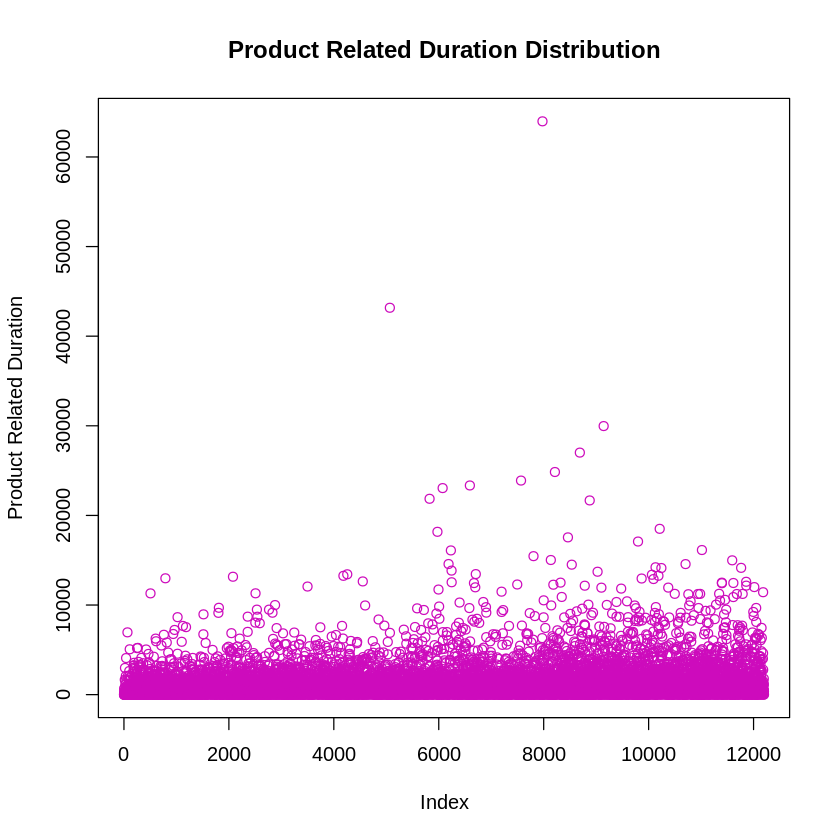

In [24]:
plot(clean_dataset$ProductRelated_Duration, col = 6, main = "Product Related Duration Distribution", ylab = "Product Related Duration")

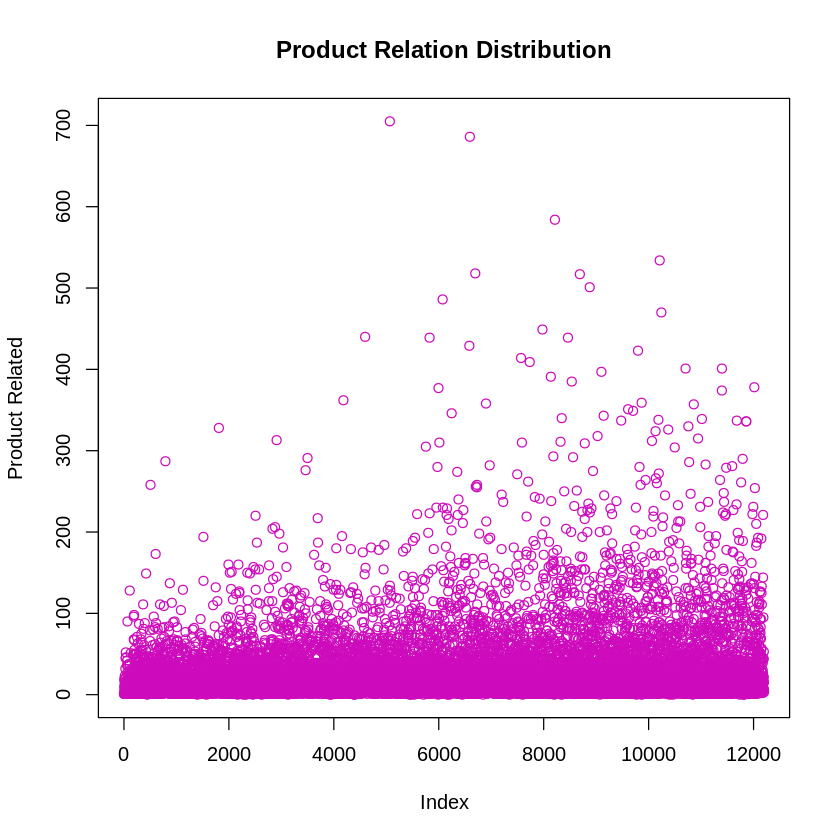

In [25]:
plot(clean_dataset$ProductRelated, col = 6, main = "Product Relation Distribution", ylab = "Product Related")

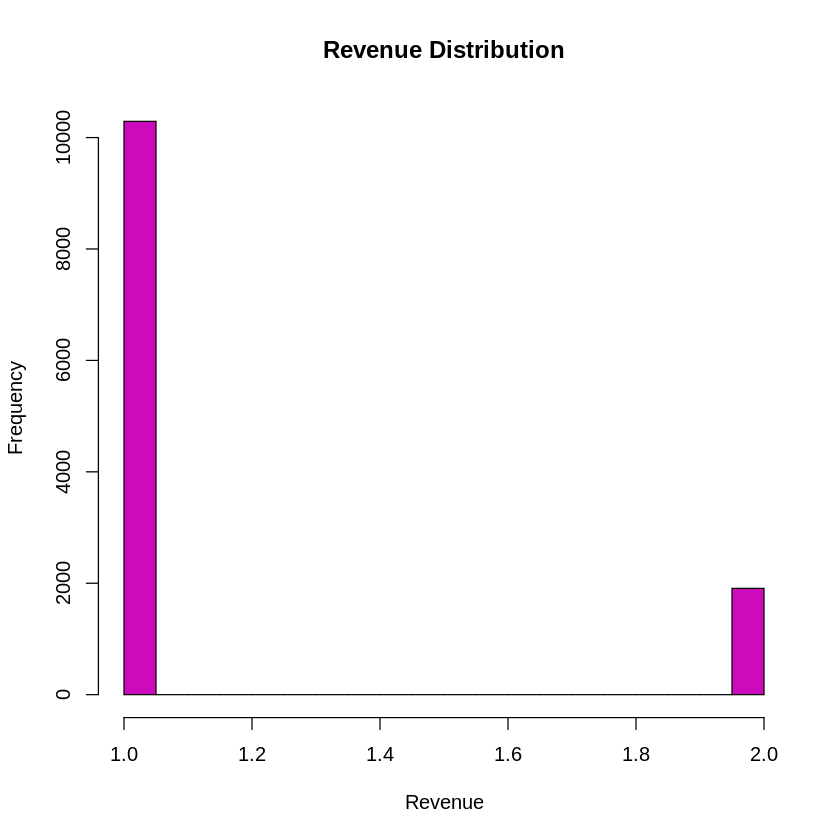

In [26]:
clean_dataset$Revenue <- as.numeric(clean_dataset$Revenue)
hist(clean_dataset$Revenue, col = 6, main = "Revenue Distribution", xlab = "Revenue")

* We notice that most of our variables are skewed to the right thus we are having a unimodal data set with the mode closer to the left of the graph

#Bivariate Analysis

1. Covariance

In [27]:
#covariance between Administrative and the target variable, whether it generated revenue
clean_dataset$Revenue <- as.numeric(clean_dataset$Revenue)
Administrative <- clean_dataset$Administrative
Revenue <- clean_dataset$Revenue
cov(Administrative, Revenue)

[1] 0.1647997

In [28]:
#Informational
Informational <- clean_dataset$Informational
Revenue <- clean_dataset$Revenue
cov(Informational, Revenue)

[1] 0.04338304

In [29]:
#Product Related
ProductRelated <- clean_dataset$ProductRelated
Revenue <- clean_dataset$Revenue
cov(ProductRelated, Revenue)

[1] 2.526437

In [30]:
#Bounce Rates
BounceRates <- clean_dataset$BounceRates
Revenue <- clean_dataset$Revenue
cov(BounceRates, Revenue)

[1] -0.002397839

In [31]:
#Visitor Type
clean_dataset$VisitorType <- as.numeric(clean_dataset$VisitorType)
VisitorType <- clean_dataset$VisitorType
Revenue <- clean_dataset$Revenue
cov(VisitorType, Revenue)

[1] 0.01343387

* There is a high covariance between between product related and revenue
* There is a low covariance between administrative, informational, bounce rates, visitor type and the class label(revenue)

2. Correlation

In [32]:
#checking the correlation between the age of and individual and whether the individual 
#clicked on the add or not
Administrative <- clean_dataset$Administrative
Revenue <- clean_dataset$Revenue
cor(Administrative, Revenue)

[1] 0.1362039

In [33]:
#Informational
Informational <- clean_dataset$Informational
Revenue <- clean_dataset$Revenue
cor(Informational, Revenue)

[1] 0.09360951

In [34]:
#Product Related
ProductRelated <- clean_dataset$ProductRelated
Revenue <- clean_dataset$Revenue
cor(ProductRelated, Revenue)

[1] 0.1559385

In [35]:
#Bounce Rates
BounceRates <- clean_dataset$BounceRates
Revenue <- clean_dataset$Revenue
cor(BounceRates, Revenue)

[1] -0.1453881

In [36]:
#Visitor Type
clean_dataset$VisitorType <- as.numeric(clean_dataset$VisitorType)
VisitorType <- clean_dataset$VisitorType
Revenue <- clean_dataset$Revenue
cor(VisitorType, Revenue)

[1] 0.09806038

* There is a weak correlation between variables in our dataset

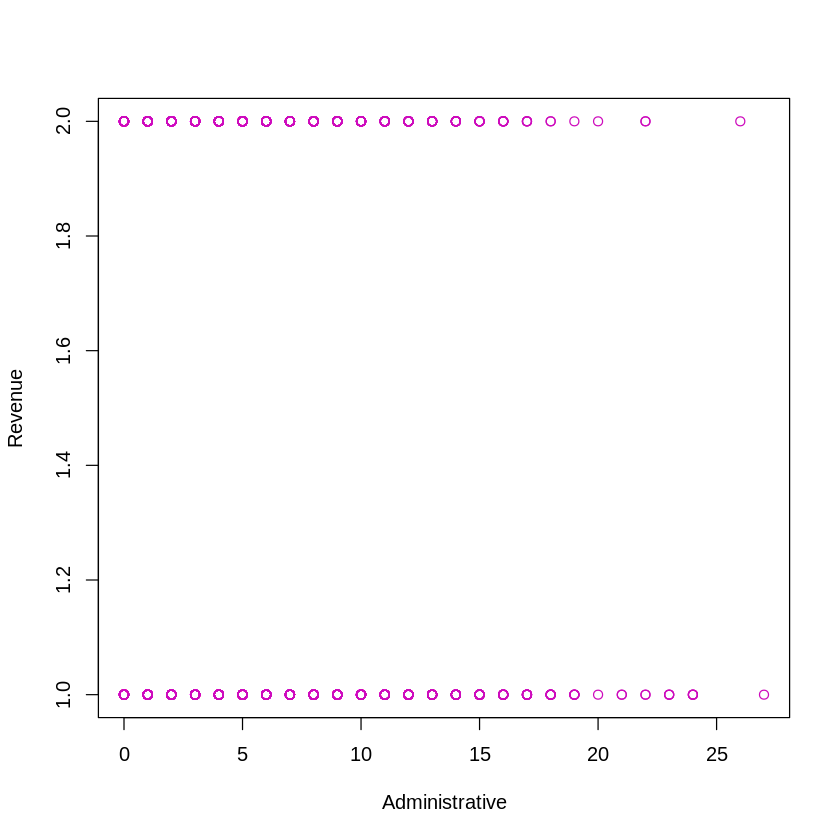

In [37]:
plot(Administrative, Revenue, xlab = "Administrative", ylab = "Revenue", col = 6)

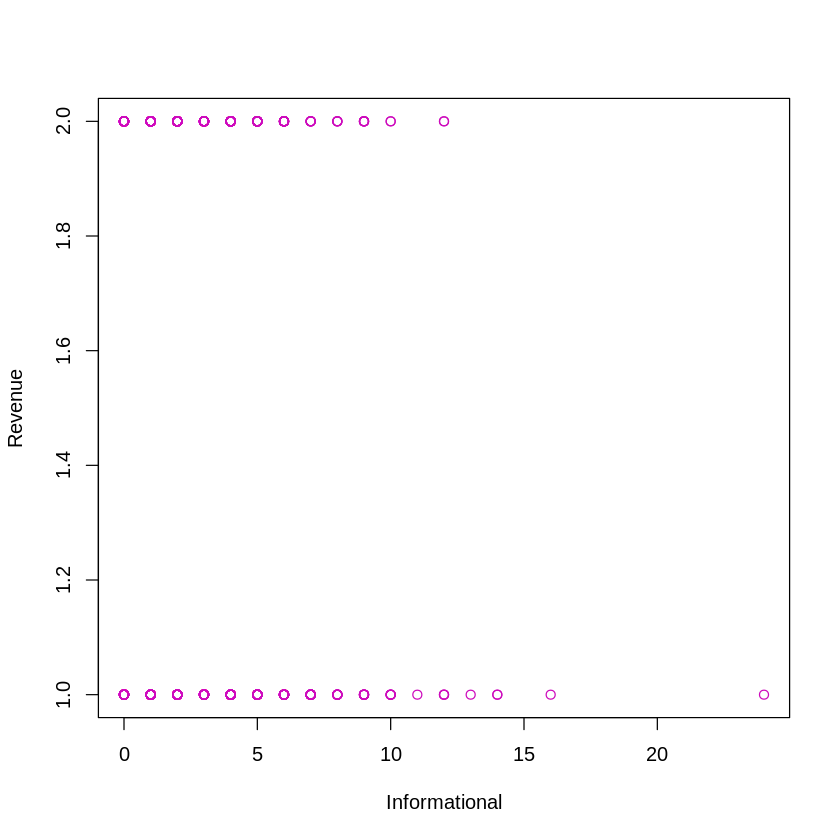

In [38]:
plot(Informational, Revenue, xlab = "Informational", ylab = "Revenue", col = 6)

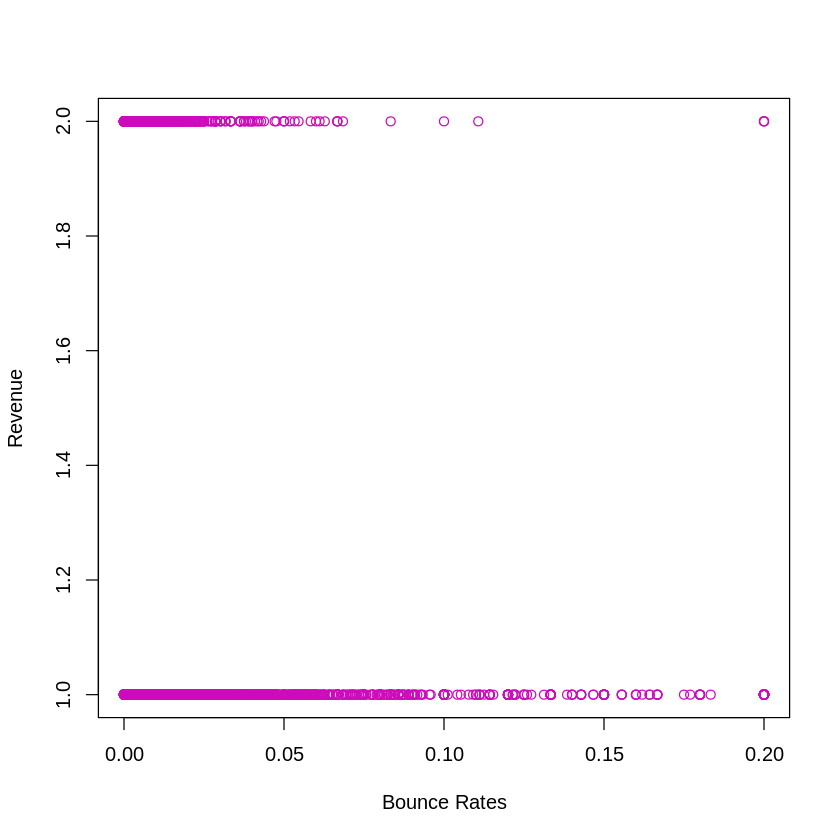

In [39]:
plot(BounceRates, Revenue, xlab = "Bounce Rates", ylab = "Revenue", col = 6)

# K-Means Clustering

In [49]:
#labels
y.labels = clean_dataset$Revenue

In [50]:
table(y.labels)

y.labels
    1     2 
10291  1908 

In [51]:
#Selecting variables to work with
X <- select(clean_dataset, Administrative, Informational, ProductRelated, BounceRates, ExitRates,
VisitorType)

In [52]:
#scaling data
X_scale <- scale(X)

In [ ]:
X_scale

In [54]:
#distance
X <- dist(X_scale)

In [57]:
#calculating the number of clusters
install.packages('factoextra')
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘matrixStats’, ‘caret’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



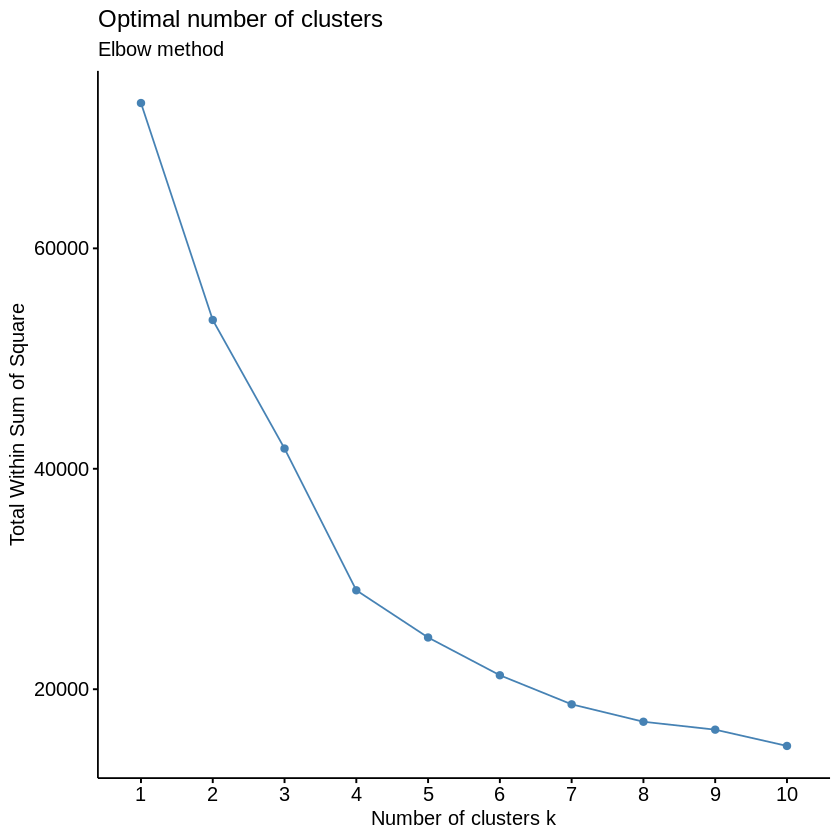

In [58]:
fviz_nbclust(X_scale, kmeans, method = "wss") + labs(subtitle = "Elbow method")

In [59]:
#Applying k means to the dataset
km.out <- kmeans(X_scale, centers = 4, nstart = 100)
print(km.out)

K-means clustering with 4 clusters of sizes 1716, 8022, 807, 1654

Cluster means:
  Administrative Informational ProductRelated BounceRates  ExitRates
1     0.05345102    -0.1736269     -0.3206931  -0.4083386 -0.5030400
2    -0.26896257    -0.2478543     -0.1662012  -0.1953686 -0.1086376
3    -0.69137076    -0.3900714     -0.6541608   3.4359486  3.1098231
4     1.58635547     1.5725627      1.4579702  -0.3052325 -0.4685127
  VisitorType
1   2.3549912
2  -0.4032028
3  -0.2323455
4  -0.3743465

Clustering vector:
    [1] 3 2 3 2 2 2 3 3 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2
   [37] 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 3 3 2 2 2 2 2 4 2 3 2 2 3 2 3 3 2
   [73] 2 2 2 2 4 2 3 3 2 2 2 2 3 3 2 2 2 2 2 3 2 1 2 2 2 2 2 2 2 2 2 2 2 3 2 2
  [109] 2 4 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 3 2 2 2 2 2 2 2 3 2 2 3
  [145] 2 2 2 2 2 2 2 3 3 2 2 2 3 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 3
  [181] 3 2 4 2 2 4 4 2 3 4 2 2 2 2 1 2 1 1 2 2 1 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2
  [

In [64]:
#Visualising the clustering algorithm results
km.clusters <- km.out$cluster
rownames(X_scale) <- paste(clean_dataset$Revenue, 1:dim(clean_dataset)[1], sep = "-")

In [65]:
X_scale

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,VisitorType
1-1,-0.7025315,-0.3988128,-0.696363515,3.954699721,3.42730699,-0.4032028
1-2,-0.7025315,-0.3988128,-0.673942448,-0.450343788,1.26501207,-0.4032028
1-3,-0.7025315,-0.3988128,-0.696363515,3.954699721,3.42730699,-0.4032028
1-4,-0.7025315,-0.3988128,-0.673942448,0.650917089,2.12993004,-0.4032028
1-5,-0.7025315,-0.3988128,-0.494573916,-0.009839437,0.18386462,-0.4032028
1-6,-0.7025315,-0.3988128,-0.292784318,-0.102577188,-0.36619285,-0.4032028
1-7,-0.7025315,-0.3988128,-0.696363515,3.954699721,3.42730699,-0.4032028
1-8,-0.4023079,-0.3988128,-0.696363515,3.954699721,3.42730699,-0.4032028
1-9,-0.7025315,-0.3988128,-0.673942448,-0.450343788,1.26501207,-0.4032028
1-10,-0.7025315,-0.3988128,-0.651521382,-0.450343788,-0.41677287,-0.4032028


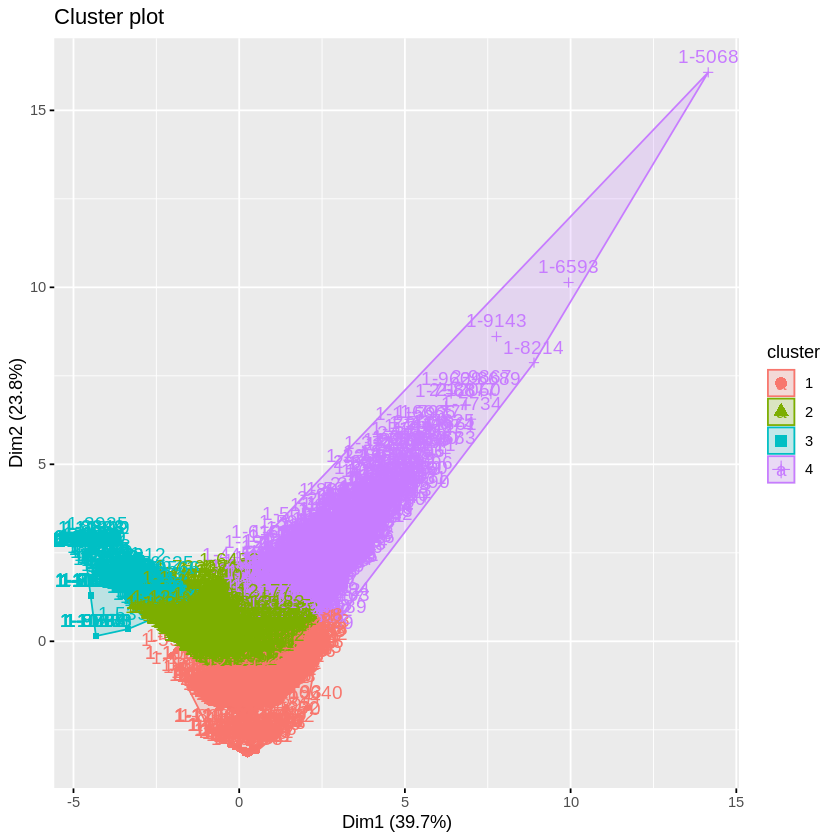

In [66]:
fviz_cluster(list(data = X_scale, cluster = km.clusters))

In [67]:
table(km.clusters, clean_dataset$Revenue)

           
km.clusters    1    2
          1 1281  435
          2 6994 1028
          3  802    5
          4 1214  440

#Hierarchical Clustering

In [68]:
#labels
clean_dataset_labels <- clean_dataset$Revenue
table(clean_dataset_labels)

clean_dataset_labels
    1     2 
10291  1908 

In [69]:
#data
clean_dataset_data <- select(clean_dataset, Administrative, Informational, ProductRelated, BounceRates, ExitRates,
VisitorType)

In [70]:
#scaling
cdd_std <- scale(clean_dataset_data)

In [71]:
#distance
cdd_dist <- dist(cdd_std)

In [72]:
# Applying hierarchical clustering 
hc.out.cd <- hclust(cdd_dist, method = "complete")
hc.out.cd


Call:
hclust(d = cdd_dist, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 12199 


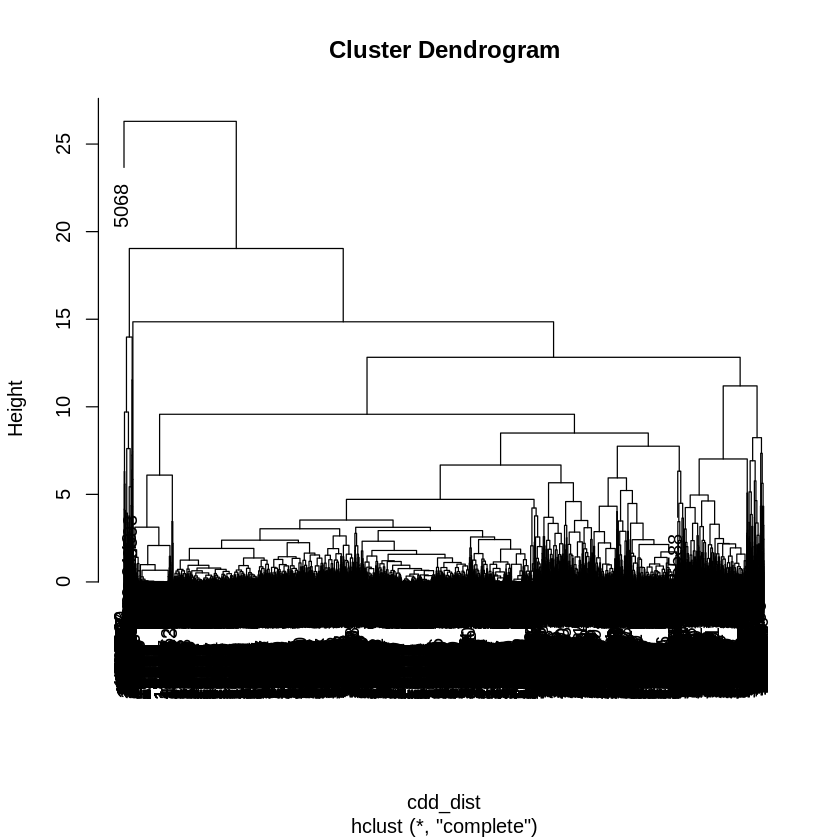

In [73]:
#Dendogram
plot(hc.out.cd)

In [77]:
#clusters
cd_clusters <- cutree(hc.out.cd, k = 4)

In [78]:
cd_clusters

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [37] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [73] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [109] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [145] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [181] 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [217] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [253] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [289] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [325] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [361] 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [397] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [433] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [469] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [505] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [541] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [577] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
  [613] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [649] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [685] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [721] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [757] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
  [793] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [829] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [865] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [901] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [937] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [973] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1009] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1045] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1081] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1117] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1153] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1189] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1225] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1261] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1333] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1369] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1405] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1441] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1477] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1513] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1549] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1585] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1621] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1657] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1693] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1729] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1765] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [18

In [79]:
length(cd_clusters)

[1] 12199

In [80]:
#visualising the clusters
rownames(cdd_std) <- paste(clean_dataset$Revenue, 1:dim(clean_dataset)[1], sep = "-")

In [81]:
cdd_std

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,VisitorType
1-1,-0.7025315,-0.3988128,-0.696363515,3.954699721,3.42730699,-0.4032028
1-2,-0.7025315,-0.3988128,-0.673942448,-0.450343788,1.26501207,-0.4032028
1-3,-0.7025315,-0.3988128,-0.696363515,3.954699721,3.42730699,-0.4032028
1-4,-0.7025315,-0.3988128,-0.673942448,0.650917089,2.12993004,-0.4032028
1-5,-0.7025315,-0.3988128,-0.494573916,-0.009839437,0.18386462,-0.4032028
1-6,-0.7025315,-0.3988128,-0.292784318,-0.102577188,-0.36619285,-0.4032028
1-7,-0.7025315,-0.3988128,-0.696363515,3.954699721,3.42730699,-0.4032028
1-8,-0.4023079,-0.3988128,-0.696363515,3.954699721,3.42730699,-0.4032028
1-9,-0.7025315,-0.3988128,-0.673942448,-0.450343788,1.26501207,-0.4032028
1-10,-0.7025315,-0.3988128,-0.651521382,-0.450343788,-0.41677287,-0.4032028


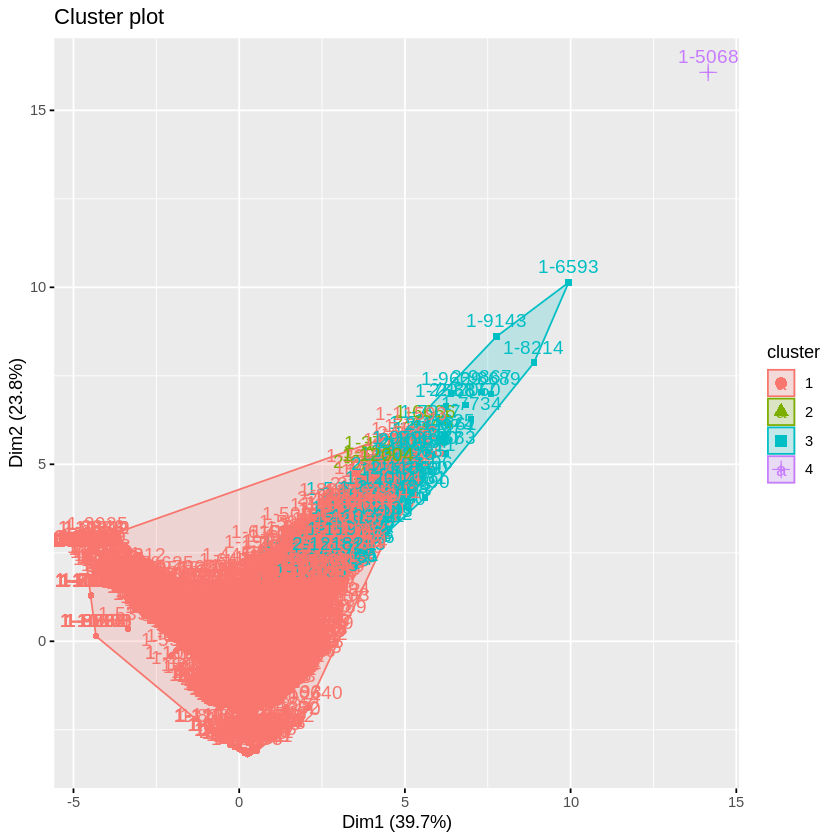

In [82]:
#visualising using fviz cluster
fviz_cluster(list(data = cdd_std, cluster = cd_clusters))

In [83]:
table(cd_clusters, clean_dataset$Revenue)

           
cd_clusters     1     2
          1 10181  1845
          2     5     2
          3   104    61
          4     1     0